In [46]:
import pandas as pd
from catalog import Scaling
from repeater import TakaAkiRepeaterCatalog
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from phase_util import catalog2catalog_phase
from geopy.distance import geodesic

mpl.rc('figure', dpi=300)
plt.rcParams.update({'font.size': 8})

# Dataset:

We use an updated catalog for the creeping section of the San Andreas Fault. Details about the catalog preparation are available here: 

Y. Li, R. Bürgmann, T. Taira, Spatiotemporal Variations of Surface Deformation, Shallow Creep Rate, and Slip Partitioning Between the San Andreas and Southern Calaveras Fault. J. Geophys. Res. Solid Earth 128, e2022JB025363 (2023).

In [7]:
repeaters = TakaAkiRepeaterCatalog(
    filename="SJBPK.freq8-24Hz_maxdist3_coh9650_linkage_cluster.txt",
) 

/Users/kdascher/Documents/Documents/Berkeley/Projects/Exploratory_projects/repeaters/repeater.py:139: RuntimeWarning: invalid value encountered in double_scalars
  return bias_correction * np.std(dt) / np.mean(dt) if len(dt) > 2 else 0


In [12]:
print(f"The catalog spans {repeaters.duration.days/365:.1f} years")

The catalog spans 35.9 years


In [13]:
bounding_box = [[-120.625, -120.525], [35.950, 36]]

safod_repeaters = (
    repeaters.get_space_slice(
        latitude_range=bounding_box[1], longitude_range=bounding_box[0]
    )
    .slice_by("depth", 2.1, 2.5)
    .slice_by("mag", 1.2, 3)
    .get_time_slice(np.datetime64("1988-01-01"), np.datetime64("2024-01-01"))
)

In [70]:
families[1].catalog

,date,lat,lon,depth,cummulative_displacement_cm,EVID,CSID,mag,slip_cm,time,family,NEV,COV,RCm
16287,1989.515860,35.98469,-120.54218,2.409,14.66753,139614,SJBPK3528_freq8-24Hz_maxdist3_coh9650,1.92,7.35529,1989-07-08 06:56:15.000003,2808,16,0.442011,896.94669
16288,1992.840692,35.98469,-120.54218,2.409,22.65299,321997,SJBPK3528_freq8-24Hz_maxdist3_coh9650,2.06,7.98546,1992-11-03 16:38:25.999996,2808,16,0.442011,896.94669
16289,1995.546162,35.98469,-120.54218,2.409,30.92479,30077530,SJBPK3528_freq8-24Hz_maxdist3_coh9650,2.12,8.27180,1995-07-19 08:22:45.999991,2808,16,0.442011,896.94669
16290,1998.000811,35.98469,-120.54218,2.409,39.10002,547969,SJBPK3528_freq8-24Hz_maxdist3_coh9650,2.10,8.17523,1998-01-01 07:06:00.000004,2808,16,0.442011,896.94669
16291,2000.608197,35.98469,-120.54218,2.409,47.46953,21119268,SJBPK3528_freq8-24Hz_maxdist3_coh9650,2.14,8.36951,2000-08-10 14:24:12.999999,2808,16,0.442011,896.94669
16292,2003.801191,35.98469,-120.54218,2.409,56.03793,30227076,SJBPK3528_freq8-24Hz_maxdist3_coh9650,2.18,8.56841,2003-10-20 10:25:46.000002,2808,16,0.442011,896.94669
16293,2004.746313,35.98469,-120.54218,2.409,64.26130,21402158,SJBPK3528_freq8-24Hz_maxdist3_coh9650,2.11,8.22337,2004-09-30 03:36:46.000010,2808,16,0.442011,896.94669
16294,2004.935255,35.98469,-120.54218,2.409,72.53310,21425829,SJBPK3528_freq8-24Hz_maxdist3_coh9650,2.12,8.27180,2004-12-08 07:16:49.000009,2808,16,0.442011,896.94669
16295,2005.537278,35.98469,-120.54218,2.409,80.66047,21469419,SJBPK3528_freq8-24Hz_maxdist3_coh9650,2.09,8.12737,2005-07-16 02:33:13.000004,2808,16,0.442011,896.94669
16296,2006.835808,35.98469,-120.54218,2.409,88.50650,21546250,SJBPK3528_freq8-24Hz_maxdist3_coh9650,2.03,7.84603,2006-11-02 01:40:25.999992,2808,16,0.442011,896.94669


In [69]:
df = safod_repeaters.catalog.groupby("family").agg({'mag':'median','depth': 'mean', 'lat': 'mean', 'lon': 'mean'})
display(df)

# measure the distance between the mean lat, lon and depth of each family
def distance(lat1, lon1, depth1, lat2, lon2, depth2, mode = "absolute"):
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    if mode == "horizontal":
        d = geodesic((lat1, lon1), (lat2, lon2)).km
    elif mode == "absolute":
        d = np.sqrt(geodesic((lat1, lon1), (lat2, lon2)).km**2 + (depth1 - depth2)**2)
    elif mode == "depth":
        d = np.abs(depth1 - depth2)
    return d

# Get the list of families
families = safod_repeaters.get_families()
family_data = pd.DataFrame(
    [
        family.catalog[["family", "mag", "depth", "lat", "lon"]].iloc[0]
        for family in families
    ]
)
display(family_data.sort_values(by="family"))

# Create a DataFrame to store the distances
distance_matrix = pd.DataFrame(
    index=[family.catalog.family.values[0] for family in families], 
    columns=[family.catalog.family.values[0] for family in families]
)

for mode in ["horizontal", "absolute", "depth"]:
    # Calculate distances between families and store them in the DataFrame
    for i, family in enumerate(families):
        for j, second_family in enumerate(families):
            if i != j:
                dist = distance(
                    family.catalog.lat.mean(), family.catalog.lon.mean(), family.catalog.depth.mean(),
                    second_family.catalog.lat.mean(), second_family.catalog.lon.mean(), second_family.catalog.depth.mean(),
                    mode=mode,
                )
                distance_matrix.iloc[i, j] = dist

    # Display the distance matrix
    print(f"{mode}-distance matrix in meters:")
    display(distance_matrix*1000)


,mag,depth,lat,lon
family,,,,
895,1.220,2.219,35.98455,-120.54218
1914,1.800,2.338,35.98439,-120.54169
2339,1.445,2.122,35.99627,-120.56514
2808,2.090,2.409,35.98469,-120.54218


,family,mag,depth,lat,lon
3289,895.0,1.22,2.219,35.98455,-120.54218
8848,1914.0,1.73,2.338,35.98439,-120.54169
11862,2339.0,1.45,2.122,35.99627,-120.56514
16287,2808.0,1.92,2.409,35.98469,-120.54218


horizontal-distance matrix in meters:


,2339,2808,1914,895
2339,NaN,49.891324,51.00186,50.012932
2808,49.891324,NaN,1.114195,0.270184
1914,51.00186,1.114195,NaN,1.000787
895,50.012932,0.270184,1.000787,NaN


absolute-distance matrix in meters:


,2339,2808,1914,895
2339,NaN,291.304212,221.939608,109.134291
2808,291.304212,NaN,71.008742,190.000192
1914,221.939608,71.008742,NaN,119.004208
895,109.134291,190.000192,119.004208,NaN


depth-distance matrix in meters:


,2339,2808,1914,895
2339,NaN,287.0,216.0,97.0
2808,287.0,NaN,71.0,190.0
1914,216.0,71.0,NaN,119.0
895,97.0,190.0,119.0,NaN


In [62]:
print(geodesic((35.98439,	-120.54169), (35.98469,	-120.54218)).km)
print(abs(2.338 - 2.409))

0.05532375465009875
0.07099999999999973


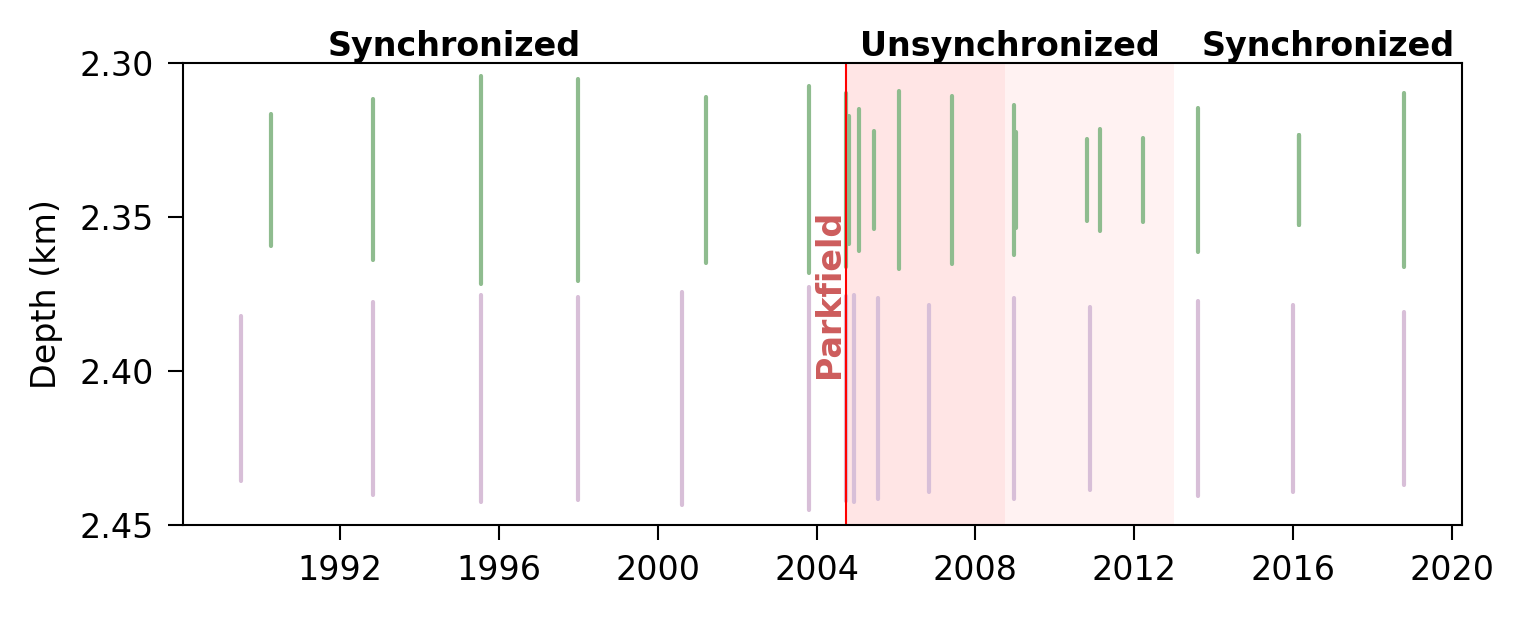

In [7]:
mean_magnitude = np.array(
    [f.catalog.mag.mean() for f in safod_repeaters.get_families()]
)
fig, ax = plt.subplots(figsize=(5.5, 2))

#thinner frame lines
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.tick_params(width=0.5)

for i, family in enumerate(
    [
        safod_repeaters.get_families()[i]
        for i in np.argsort(mean_magnitude).astype(int)[-2:]
    ]
):
    for t, m, depth in zip(
        family.catalog.time, family.catalog.mag, family.catalog.depth
    ):
        L = Scaling.magnitude_to_size(m, stress_drop_Pa=50e6)
        ax.plot(
            [t, t],
            [depth - L, depth + L],
            c=["darkseagreen", "thistle"][i % 2],
            lw=1,
            solid_capstyle="round",
        )

before_parkfield = [np.datetime64("1985-01-01"), np.datetime64("2004-09-28")]
unsinc_interval1 = [np.datetime64("2004-09-28"), np.datetime64("2008-09-28")]
unsinc_interval2 = [np.datetime64("2004-09-28"), np.datetime64("2013-01-01")]
after_parkfield = [np.datetime64("2013-09-28"), np.datetime64("2020-01-01")]

# add text labels centered *above* before_parkfield, unsinc_interval2, and after_parkfield
text_kwargs = dict(ha="center", va="bottom", fontsize=8, fontweight="bold")
ax.text(before_parkfield[0] + (before_parkfield[1] - before_parkfield[0])/2, 2.3, "Synchronized", **text_kwargs)
ax.text(unsinc_interval2[0] + (unsinc_interval2[1] - unsinc_interval2[0])/2, 2.3, "Unsynchronized", **text_kwargs)
ax.text(after_parkfield[0] + (after_parkfield[1] - after_parkfield[0])/2, 2.3, "Synchronized", **text_kwargs)

ax.text(np.datetime64("2004-09-28"), 2.375, "Parkfield", rotation=90, fontsize=8, fontweight="bold", ha="right", va="center", color="indianred")

ax.axvline(np.datetime64("2004-09-28"), c="r", lw=0.5)
ax.axvspan(
    *unsinc_interval1, facecolor="r", alpha=0.05
)
ax.axvspan(
    *unsinc_interval2, facecolor="r", alpha=0.05
)
ax.set(ylabel="Depth (km)", ylim=[2.3, 2.45])

plt.gca().invert_yaxis()


In [8]:
family_dict = {
    k: safod_repeaters.get_families()[i]
    for k, i in zip(
        ["LA", "SF"], np.argsort(mean_magnitude).astype(int)[-2:]
    )
}

In [9]:
def plot_phase_distribution(ax, catalog1, catalog2, plot_order=True):
    ax.axvline(0, c="darkseagreen", lw=1.5)
    ax.scatter(0, 0, c="darkseagreen", s=5)
    phase_distribution = catalog2catalog_phase(
        catalog1, catalog2
    )
    markerline, stemline, base = ax.stem(phase_distribution, np.ones(len(phase_distribution)), label="Measured phase")  
    plt.setp(markerline, "linewidth", 0.1, color="mediumpurple", markersize=3)
    plt.setp(stemline, "linewidth", 0.5, color="mediumpurple")
    plt.setp(base, "linewidth", 0.5, color='white')
    
    if plot_order:
        R = np.abs(np.sum(np.exp(1j * phase_distribution)))/len(phase_distribution)
        theta_effective = np.angle(np.sum(np.exp(1j * phase_distribution)))
        markerline, stemline, base = ax.stem(theta_effective, R, label="Order parameter (R)")
        plt.setp(markerline, "linewidth", 0.1, "color", "k", markersize=1.5)
        plt.setp(stemline, "linewidth", 0.5, "color", "k")
        plt.setp(base, "linewidth", 0.5, color='white')
    
    ax.set(
        xlim=[0, 2 * np.pi],
        xticks=[],
        yticks=[],
        ylim=[0, 1.1],
    )
    
    ax.set_title(f"$R:{np.mean(R):.2f}_{{(N={len(phase_distribution)})}}$")

    ax.spines['polar'].set_color("darkseagreen")
    
    return ax

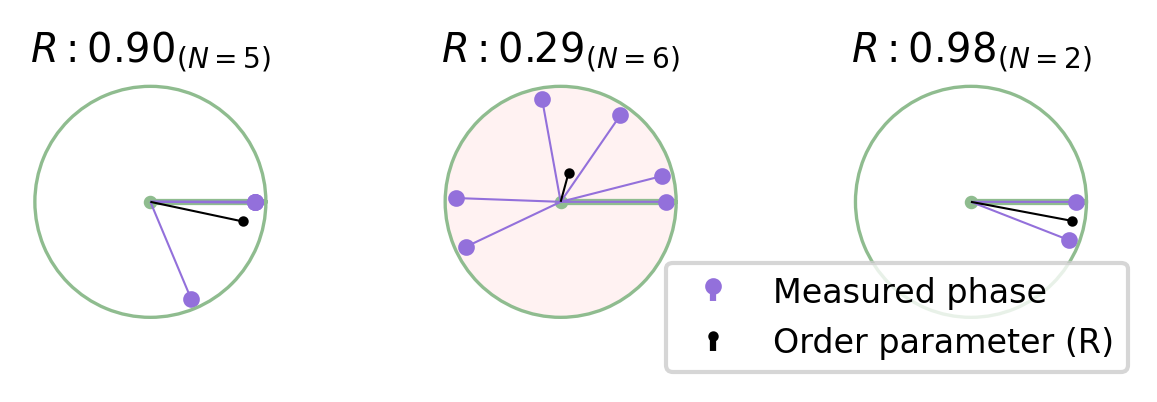

In [10]:
fig, ax = plt.subplots(1,3, subplot_kw={"projection": "polar"}, figsize=(5,1))

for i, time_range in enumerate([before_parkfield, unsinc_interval2, after_parkfield]):
    plot_phase_distribution(
        ax[i],
        family_dict["SF"].get_time_slice(*time_range),
        family_dict["LA"],
    )
 
# set background color red   
ax[1].set_facecolor([1, 0.95, 0.95])
ax[-1].legend(loc="right", bbox_to_anchor=(1.25, 0))
    
    
    